<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Health-seeking" data-toc-modified-id="Health-seeking-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Health-seeking</a></span></li><li><span><a href="#CHW-performance" data-toc-modified-id="CHW-performance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CHW performance</a></span></li></ul></div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

## Health-seeking 

In [9]:
# Heatmap: x-axis transmission intensity, y-axis HS rate, color RCD effect size
df_full = pd.read_csv("full_sim_data.csv")
df = df_full[df_full["year"]==3].sort_values(["o5_hs_rate", "intervention_package"])

In [7]:
metric = "avg_RDT_prev"

df_hs60 = df[df["intervention_package"]=="HS60_only"]

NameError: name 'df' is not defined

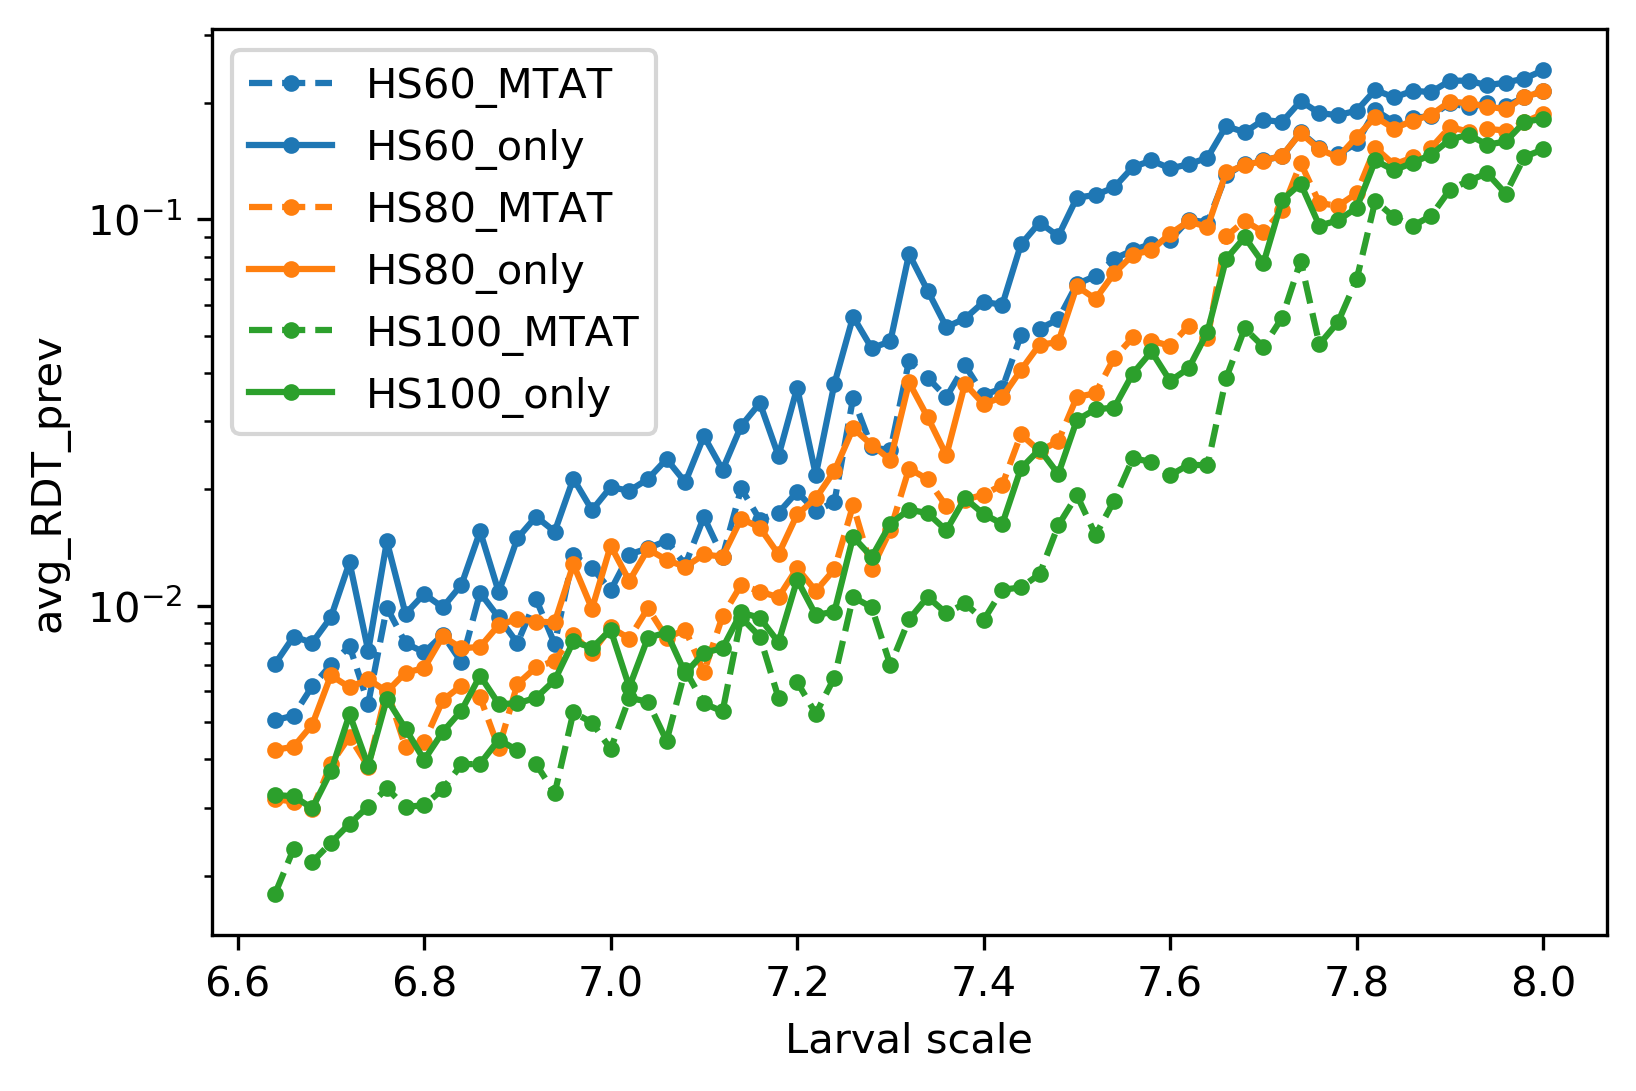

In [12]:
metric = "avg_RDT_prev"

plt.figure(dpi=300)
subplot_index=1
for i, sdf in df.groupby(["u5_hs_rate","intervention_package"]):
    u5_hs_rate = i[0]
    intervention_package = i[1]
    
    color_dict = {0.6: "C0",
                 0.8: "C1",
                 1.0: "C2"}
    c = color_dict[u5_hs_rate]
    
    if "_MDA" in intervention_package:
        linestyle=None
    elif "_MTAT" in intervention_package:
        linestyle = 'dashed'
    else:
        linestyle='solid'
    
    if linestyle:
        foo = sdf.groupby("funest").agg("mean").reset_index()
        plt.plot(foo["funest"], foo[metric], label=intervention_package, marker='.', c=c, linestyle=linestyle)
    
    
    
    subplot_index += 1
plt.legend()
plt.xlabel("Larval scale")
plt.ylabel(metric)
plt.yscale("log")

In [15]:
df_hs60 = df[df["intervention_package"]=="HS60_only"]
baseline = df_hs60.groupby("funest").agg("mean").reset_index()
baseline = baseline[["funest", "EIR","cases","avg_RDT_prev"]]

baseline.rename(columns={"EIR": "baseline_EIR",
                        "cases": "baseline_cases",
                        "avg_RDT_prev": "baseline_avg_RDT_prev"},
               inplace=True)


Text(0, 0.5, 'EIR')

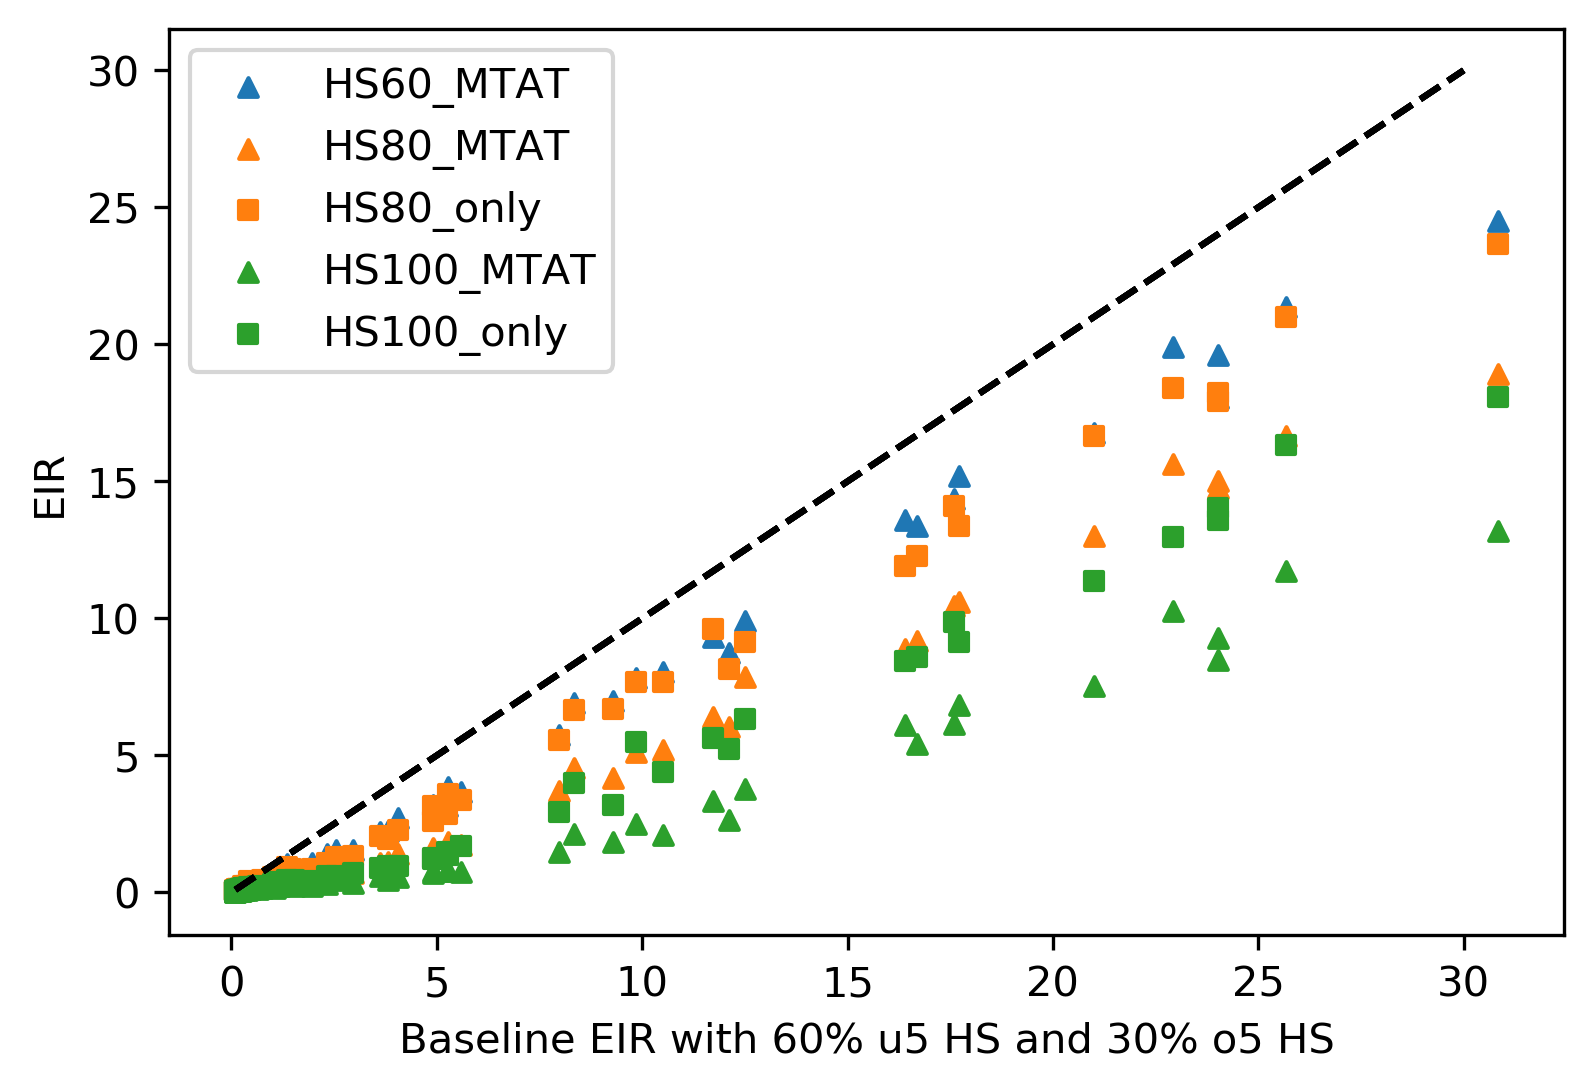

In [16]:
metric = "EIR"

plt.figure(dpi=300)
subplot_index=1
for i, sdf in df.groupby(["u5_hs_rate","intervention_package"]):
    u5_hs_rate = i[0]
    intervention_package = i[1]
    
    color_dict = {0.6: "C0",
                 0.8: "C1",
                 1.0: "C2"}
    c = color_dict[u5_hs_rate]
    
    if "_MDA" in intervention_package or intervention_package == "HS60_only":
        marker=None
    elif "_MTAT" in intervention_package:
        marker = '^'
    else:
        marker='s'
    
    if marker:
        foo = sdf.groupby("funest").agg("mean").reset_index()
        foo = foo[["EIR", "funest", "cases", "avg_RDT_prev"]].merge(baseline,)
        plt.scatter(foo["baseline_{}".format(metric)], foo[metric], label=intervention_package, c=c, marker=marker, s=20)
        
        # Fit spline:
        func_fit = np.polyfit(x, y, 3)
        func = np.poly1d(func_fit)
        
        if metric == "avg_RDT_prev":
            xlim = 0.25
        elif metric == "EIR":
            xlim = 30
        elif metric == "cases":
            xlim = 800    
        plt.plot([0.1,xlim],[0.1,xlim], color='black',linestyle='dashed')
        
        # Spline:
        
    
    
    
    subplot_index += 1
plt.legend()
plt.xlabel("Baseline {} with 60% u5 HS and 30% o5 HS".format(metric))
plt.ylabel(metric)

# plt.yscale("log")

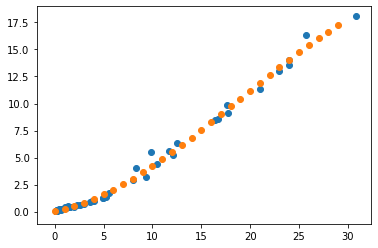

In [26]:
x = foo["baseline_{}".format(metric)]
y =foo[metric]

plt.scatter(x,y)
plt.scatter(np.arange(30), func(np.arange(30)))

func_fit = np.polyfit(x, y, 3)
func = np.poly1d(func_fit)

In [25]:
func(0.1)

0.07081604947476333

## CHW performance

In [43]:
df_full = pd.read_csv("full_sim_data.csv")
df_full = df_full[df_full["year"]==3].sort_values(by=["funest","Run_Number"]).reset_index(drop=True)
df_none = df_full[df_full["intervention_package"]=="HS60_only"].sort_values(by=["funest","Run_Number"]).reset_index(drop=True)
df_high = df_full[df_full["intervention_package"]=="HS60_MTAT"].sort_values(by=["funest","Run_Number"]).reset_index(drop=True)

df_low = pd.read_csv("output/endpoints_0a5f559a-186e-ea11-a2c5-c4346bcb1550.csv")
df_low = df_low[df_low["year"]==3]

# df_high["CHW_performance"] = "high"
# df_low["CHW_performance"] = "low"
df_performance = pd.concat([df_high, df_low])

foo_none = df_none.groupby("funest").agg("mean").reset_index()
foo_high = df_high.groupby("funest").agg("mean").reset_index()
foo_low = df_low.groupby("funest").agg("mean").reset_index()

c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


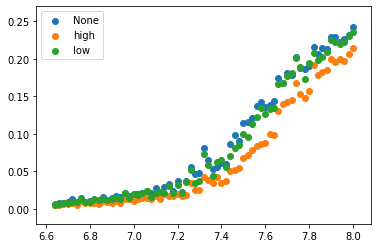

In [24]:
metric = "avg_RDT_prev"
plt.scatter(foo_none["funest"], foo_none[metric], label="None")
plt.scatter(foo_high["funest"], foo_high[metric],label="high")
plt.scatter(foo_low["funest"], foo_low[metric],label="low")

plt.legend()
# plt.yscale("log")

(0, 0.6)

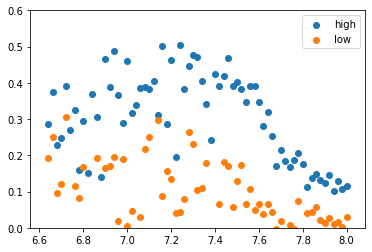

In [35]:
metric = "avg_RDT_prev"
plt.scatter(foo_high["funest"], (foo_none[metric]-foo_high[metric])/foo_none[metric],label="high")
plt.scatter(foo_low["funest"], (foo_none[metric]-foo_low[metric])/foo_none[metric],label="low")

plt.legend()
# plt.yscale("log")
plt.ylim([0,0.6])

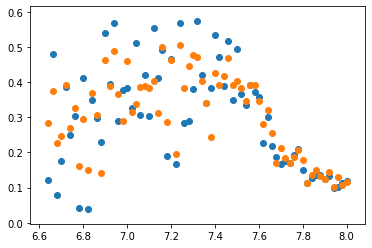

In [62]:
# Above plot is aggregating over all runs, then finding effect size.  
# What if you do opposite order: find effect size for each run, then aggregate?
# RESULT: looks pretty similar!  That's reassuring.

metric = "avg_RDT_prev"
df_high["effect_size"] = (df_none[metric]-df_high[metric])/df_none[metric]

foo_high2= df_high.groupby("funest").agg("median").reset_index()

plt.scatter(foo_high2["funest"], foo_high2["effect_size"])
plt.scatter(foo_high["funest"], (foo_none[metric]-foo_high[metric])/foo_none[metric],label="high")



Text(0, 0.5, 'Percent reduction in avg_RDT_prev')

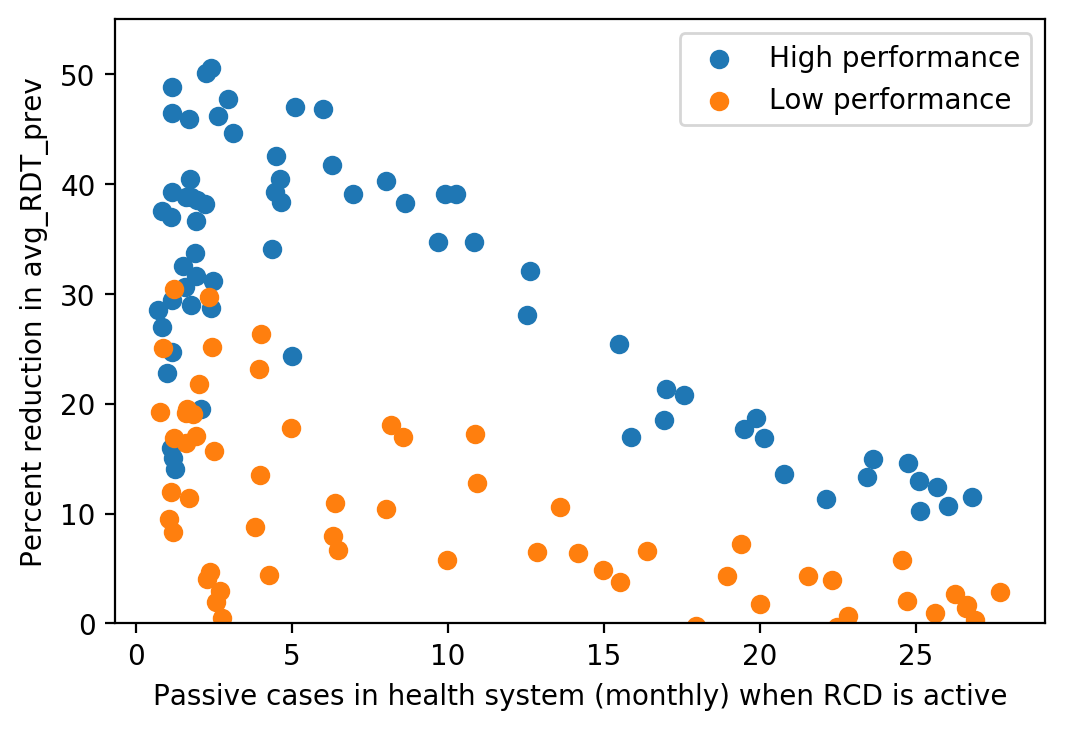

In [78]:
# Now frame things in terms of observables
plt.figure(dpi=200)

metric = "avg_RDT_prev"
plt.scatter(foo_high["received_treatment"]/12, 100*(foo_none[metric]-foo_high[metric])/foo_none[metric],label="High performance")
plt.scatter(foo_low["received_treatment"]/12, 100*(foo_none[metric]-foo_low[metric])/foo_none[metric],label="Low performance")

plt.legend()
# plt.yscale("log")
plt.ylim([0,55])
plt.xlabel("Passive cases in health system (monthly) when RCD is active")
plt.ylabel("Percent reduction in {}".format(metric))

In [5]:
def get_intervention_effect_size(df_with_intervention, df_without_intervention):
    

,EIR,Run_Number,arab,average_age_clinical,average_age_population,average_age_severe,avg_RDT_prev,cases,dll_collection_id,exe_collection_id,...,rcd_on,received_RCD_drugs,received_campaign_drugs,received_test,received_treatment,severe_cases,sim_id,u5_hs_rate,x_Vector_Migration_Local,year
82800,0.088239,0,7.44,29.812823,31.260261,NaN,0.007128,45.999999,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,17.0,0.0,203.0,18.0,0.0,6bf6a52a-3e69-ea11-a2c5-c4346bcb1550,0.6,10,0
82801,0.002160,0,7.44,10.105325,31.329857,NaN,0.000866,5.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,1.0,0.0,56.0,3.0,0.0,6bf6a52a-3e69-ea11-a2c5-c4346bcb1550,0.6,10,1
82802,0.183108,0,7.44,32.707625,31.431062,NaN,0.013963,83.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,23.0,0.0,388.0,23.0,0.0,6bf6a52a-3e69-ea11-a2c5-c4346bcb1550,0.6,10,2
82803,0.002431,0,7.44,8.912549,31.607934,NaN,0.000806,3.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,1.0,0.0,35.0,1.0,0.0,6bf6a52a-3e69-ea11-a2c5-c4346bcb1550,0.6,10,3
82804,0.171318,1,7.44,26.027738,30.325339,NaN,0.015270,82.999999,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,16.0,0.0,241.0,25.0,0.0,ca461f43-3e69-ea11-a2c5-c4346bcb1550,0.6,10,0
82805,0.149196,1,7.44,29.155047,30.101353,NaN,0.007925,44.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,7.0,0.0,158.0,12.0,0.0,ca461f43-3e69-ea11-a2c5-c4346bcb1550,0.6,10,1
82806,0.017802,1,7.44,17.036646,30.536843,NaN,0.002164,11.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,2.0,0.0,52.0,2.0,0.0,ca461f43-3e69-ea11-a2c5-c4346bcb1550,0.6,10,2
82807,0.075161,1,7.44,32.607116,30.771530,NaN,0.006045,38.000001,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,11.0,0.0,187.0,13.0,0.0,ca461f43-3e69-ea11-a2c5-c4346bcb1550,0.6,10,3
82808,0.086409,2,7.44,23.508654,31.011500,NaN,0.008336,48.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,16.0,0.0,266.0,14.0,0.0,b1ed2b4f-3e69-ea11-a2c5-c4346bcb1550,0.6,10,0
82809,0.044589,2,7.44,25.002619,30.945948,NaN,0.004667,24.000000,56e50264-ab67-ea11-a2c5-c4346bcb1550,020974d9-ed9c-e911-a2c1-c4346bcb1555,...,True,8.0,0.0,192.0,7.0,0.0,b1ed2b4f-3e69-ea11-a2c5-c4346bcb1550,0.6,10,1
